# 📊 Red Hat OpenShift AI 上的 AI/ML 基础概念与代码示意

## 重要概念

- 机器学习中的基本概念：

  - 特征（features）

  - 目标变量（target variables）：标记数据（可包含连续的数值）

  - 超参数（hyperparameters）

  - 模型（model）  

  - 训练（training）

  - 推理（inference）

  - 评估（evalution）：为了评估训练后数据集中的预期值与模型生成的实际值之间的偏差，计算偏差或性能使用均方根误差、精确率与召回率等指标。

- 机器学习类型：

  - 监督学习：

    - 此类学习方式会从标记的数据中学习

    - 模型类型：线性回归、逻辑回归、支持向量机（`SVM`）、决策树、随机森林、神经网络

  - 无监督学习：

    - 此类学习方式会从未标记的数据中学习，以发现数据中隐藏的结构或见解，而无需有关目标的明确指导。在这种情况下，数据集不包含目标变量。

    - 模型类型：K 均值聚类、K 最邻近（`KNN`）、主成分分析（`PCA`）、自动编码神经网络

    - 大语言模型（`LLM`）属于无监督学习范畴

- RHOAI 整体架构：

  ![01-rhoai-advanced-architecture.jpg](pictures/01-rhoai-advanced-architecture.jpg)

- 🔥 RHOAI 基于的上游项目：

  - 数据科学管道项目（Data Science Pipelines）基于 `Tekton` 与 [Kubeflow](https://www.kubeflow.org/) 上游项目，可使用 `Elyra` GUI 可视化创建管道。

  - RHOAI 基于开放数据中心（[Open Data Hub](https://opendatahub.io/), `ODH`）上游项目

- RHOAI 中涵盖了典型的 AI/ML 工作流，如下所示：

  ![04-machine-learning-model-by-zomi-details.png](pictures/04-machine-learning-model-by-zomi-details.png)

- 🔥 RHOAI 中的 AI/ML 工作流示意：

  ![02-ml-workflow-in-rhoai.jpg](pictures/02-ml-workflow-in-rhoai.jpg)

  - RHOAI 中的组件通过 operator 的方式进行部署安装

  - RHOAI GPU 功能需要 `NVIDIA GPU Operator`

  - RHOAI 工作台（workbench）作为 OpenShift Pod 运行，专为机器学习和数据科学而设计。

  - 为此，工作台包含 `JupyterLab Notebook` 执行环境、标准数据科学库（如 TensorFlow）和 GPU 加速功能等。

  - 在 RHOAI 中，数据科学管道是以自动化方式执行脚本或 Jupyter Notebook 的工作流。

  - `JupyterLab` 的前身被称为 Jupyter Notebook

  - RHOAI 提供工作台镜像，以便使用 `TensorFlow`、`PyTorch` 和 `Scikit-learn` 等常用库来训练模型。

  - AI 模型、机器学习模型（或简称模型）是机器学习工作流训练阶段产生的主要制品

  - 通常，开发人员还需要 HTTP API 或类似的 API，以便面向公众公开模型。

  - 在 RHOAI 中，模型服务器是自动部署模型的组件。

  - RHOAI 使用 [KServe](https://kserve.github.io/website) 作为模型服务平台，并支持 `OpenVINO`、`Triton`、文本生成推断服务器（`TGIS`）和 `Caikit` 等模型运行时。

  - 模型服务器使用数据连接从 S3 模型存储下载模型文件

  - 将模型服务器文件下载到容器中后，模型服务器会通过标准 REST 或 gRPC API 公开模型。

## 关于 JupyterLab 与 Notebook 的使用

In [ ]:
$ pip3 install --upgrade jupyterlab jupyterlab-git
# 安装 JupyterLab Git 扩展，安装完成后可在 Web 页面左侧边栏显示。

## 部署 Red Hat OpenShift AI (RHOAI)

- RHOAI 通过 operator 的方式部署自定义资源（`CRD`）

- 相关的自定义资源对象包括：

  - `FeatureTracker` CRD：负责保持对 operator 创建的 OpenShift 资源的引用，以实现未使用的资源对象的垃圾回收。

  - `DSCInitialization` CRD：负责验证需要存在的所有 Kubernetes 对象，如 Namespace、ConfigMap、NetworkPolicy、Service、Role 等。

  - `DataScienceCluster` CRD (DSC)：负责创建 FeatureTracker 对象与 DSCInitialization 对象。
 
- 因此，OpenShift 管理员只需创建 DataScienceCluster 资源即可，且一个集群中只能定义一个此资源对象。 

## NumPy、Pandas 与 Matplotlib 库在科学计算中的使用

- 数据探索与预处理常用库：`NumPy`、`Pandas`、`Scikit-learn`

### NumPy 数组

numpy 数组的属性与魔法命令

In [9]:
%time import numpy as np  # 魔法命令（行命令）将同一行作为参数

data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
data
data.shape  # shape 属性：3x3 矩阵

matrix_a = np.array([[0, 1, 1], [1, 0, 0]])
matrix_a.shape  # 2x3 矩阵

CPU times: total: 0 ns
Wall time: 0 ns


(2, 3)

numpy 数组的运算

In [10]:
import numpy as np

data > 5
data * 10
data - [[0.1,0.2,0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9]]

array([[0.9, 1.8, 2.7],
       [3.6, 4.5, 5.4],
       [6.3, 7.2, 8.1]])

numpy 数组的切片（slice）

In [11]:
import numpy as np

data[0:2]    # start:stop:step
data[:, :-1]  # : 表示索引所有行，:-1 表示索引除最后一列外的所有列。

array([[1, 2],
       [4, 5],
       [7, 8]])

### Pandas 数据探索与预处理

- Pandas 提供 `DataFrame` 数据结构，将值存储于 NumPy 数组中。

- Pandas 提供 `read_*` 函数，可从 CSV、XML、JSON、Parquet、HDF5 或 SQL 等多种格式来源加载数据。

直接创建 DataFrame 数据结构，以 to_string() 方法返回。

In [28]:
import pandas as pd

df = pd.DataFrame({
  "A": [1, 2, 3],
  "B": [4, 5, 6]
})

print(df.to_string())

   A  B
0  1  4
1  2  5
2  3  6


read_csv() 函数、head() 方法、iloc 属性、values 属性

In [27]:
import pandas as pd

dataframe = pd.read_csv("./src_data/us_tornado_dataset_1950_2021.csv")
dataframe  # 以 DataFrame 形式返回整个 CSV 文件内容

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,1950-01-03,IL,3,3,0,39.1000,-89.3000,39.1200,-89.2300,3.60,130
1,1950,1,3,1950-01-03,MO,3,3,0,38.7700,-90.2200,38.8300,-90.0300,9.50,150
2,1950,1,3,1950-01-03,OH,1,1,0,40.8800,-84.5800,0.0000,0.0000,0.10,10
3,1950,1,13,1950-01-13,AR,3,1,1,34.4000,-94.3700,0.0000,0.0000,0.60,17
4,1950,1,25,1950-01-25,IL,2,0,0,41.1700,-87.3300,0.0000,0.0000,0.10,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67553,2021,12,30,2021-12-30,GA,1,0,0,31.1703,-83.3804,31.1805,-83.3453,2.19,150
67554,2021,12,30,2021-12-30,GA,1,0,0,31.6900,-82.7300,31.7439,-82.5412,11.71,300
67555,2021,12,31,2021-12-31,AL,1,0,0,34.2875,-85.7878,34.2998,-85.7805,0.95,50
67556,2021,12,31,2021-12-31,GA,1,0,0,33.7372,-84.9998,33.7625,-84.9633,2.75,150


In [13]:
dataframe.head()  # 返回 DataFrame 的前 5 行信息

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10
3,1950,1,13,1950-01-13,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17
4,1950,1,25,1950-01-25,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100


In [18]:
another_dataframe = dataframe.iloc[:,:-1]  # 支持 NumPy 数组切片
another_dataframe

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len
0,1950,1,3,1950-01-03,IL,3,3,0,39.1000,-89.3000,39.1200,-89.2300,3.60
1,1950,1,3,1950-01-03,MO,3,3,0,38.7700,-90.2200,38.8300,-90.0300,9.50
2,1950,1,3,1950-01-03,OH,1,1,0,40.8800,-84.5800,0.0000,0.0000,0.10
3,1950,1,13,1950-01-13,AR,3,1,1,34.4000,-94.3700,0.0000,0.0000,0.60
4,1950,1,25,1950-01-25,IL,2,0,0,41.1700,-87.3300,0.0000,0.0000,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67553,2021,12,30,2021-12-30,GA,1,0,0,31.1703,-83.3804,31.1805,-83.3453,2.19
67554,2021,12,30,2021-12-30,GA,1,0,0,31.6900,-82.7300,31.7439,-82.5412,11.71
67555,2021,12,31,2021-12-31,AL,1,0,0,34.2875,-85.7878,34.2998,-85.7805,0.95
67556,2021,12,31,2021-12-31,GA,1,0,0,33.7372,-84.9998,33.7625,-84.9633,2.75


In [31]:
dataframe.values  # 访问 DataFrame 数据结构

,inj,fat,slat,slon,elat,elon,len
inj,1.000000,0.761776,-0.011010,0.031863,0.042888,-0.039848,0.257219
fat,0.761776,1.000000,-0.011070,0.022091,0.037168,-0.035873,0.237817
slat,-0.011010,-0.011070,1.000000,-0.173159,0.181996,-0.043552,-0.002392
slon,0.031863,0.022091,-0.173159,1.000000,0.040213,0.045419,0.052290
elat,0.042888,0.037168,0.181996,0.040213,1.000000,-0.972665,0.277226
elon,-0.039848,-0.035873,-0.043552,0.045419,-0.972665,1.000000,-0.271882
len,0.257219,0.237817,-0.002392,0.052290,0.277226,-0.271882,1.000000


利用索引进行输出

In [20]:
x = dataframe.drop("mag", axis=1)  # 排除 mag 索引的列
x  # 打印 x 的行与列

,yr,mo,dy,date,st,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,1950-01-03,IL,3,0,39.1000,-89.3000,39.1200,-89.2300,3.60,130
1,1950,1,3,1950-01-03,MO,3,0,38.7700,-90.2200,38.8300,-90.0300,9.50,150
2,1950,1,3,1950-01-03,OH,1,0,40.8800,-84.5800,0.0000,0.0000,0.10,10
3,1950,1,13,1950-01-13,AR,1,1,34.4000,-94.3700,0.0000,0.0000,0.60,17
4,1950,1,25,1950-01-25,IL,0,0,41.1700,-87.3300,0.0000,0.0000,0.10,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67553,2021,12,30,2021-12-30,GA,0,0,31.1703,-83.3804,31.1805,-83.3453,2.19,150
67554,2021,12,30,2021-12-30,GA,0,0,31.6900,-82.7300,31.7439,-82.5412,11.71,300
67555,2021,12,31,2021-12-31,AL,0,0,34.2875,-85.7878,34.2998,-85.7805,0.95,50
67556,2021,12,31,2021-12-31,GA,0,0,33.7372,-84.9998,33.7625,-84.9633,2.75,150


In [22]:
y = dataframe.mag  # 仅输出 mag 索引的列
y  # 打印 y 的行与列（此处仅含有 1 列）

0        3
1        3
2        1
3        3
4        2
        ..
67553    1
67554    1
67555    1
67556    1
67557    1
Name: mag, Length: 67558, dtype: int64

使用条件表达式索引、count() 方法与 sum() 方法

In [23]:
#y == 1
y[y == 1].count()  # 过滤 DataFrame：count() 方法统计输出值为 1 的个数
#(y == 1).sum()  # 不过滤 DataFrame：sum() 方法统计输出值为 1 的个数

22885

利用 corr() 方法计算每一列之间的皮尔森相关系数

In [26]:
corrM = dataframe[["inj","fat","slat","slon","elat","elon","len"]].corr()
corrM.style.background_gradient().format(precision=3)

,inj,fat,slat,slon,elat,elon,len
inj,1.000,0.762,-0.011,0.032,0.043,-0.040,0.257
fat,0.762,1.000,-0.011,0.022,0.037,-0.036,0.238
slat,-0.011,-0.011,1.000,-0.173,0.182,-0.044,-0.002
slon,0.032,0.022,-0.173,1.000,0.040,0.045,0.052
elat,0.043,0.037,0.182,0.040,1.000,-0.973,0.277
elon,-0.040,-0.036,-0.044,0.045,-0.973,1.000,-0.272
len,0.257,0.238,-0.002,0.052,0.277,-0.272,1.000


### Matplotlib

三次函数示例

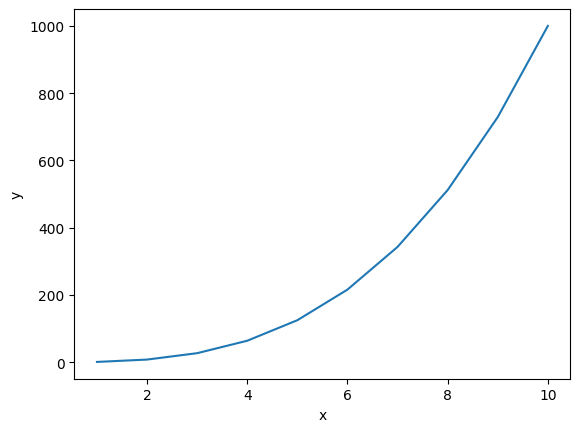

CPU times: total: 125 ms
Wall time: 125 ms


In [33]:
%%time
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = x ** 3

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

正弦函数示例

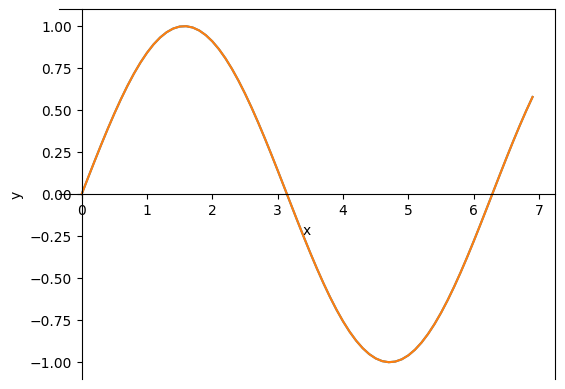

CPU times: total: 219 ms
Wall time: 224 ms


In [41]:
%%time
# 魔法命令（单元格命令）将后续作为参数
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x, y)

x = np.arange(0, 7, 0.1)
y = np.sin(x)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 参考链接

[现今的机器学习介绍](https://opensource.com/article/17/9/introduction-machine-learning)

[什么是 MLOps？](https://www.redhat.com/en/topics/ai/what-is-mlops)

[红帽 AI/ML 与 MLOps 客户成功故事](https://www.redhat.com/en/blog/red-hat-ai/ml-and-mlops-customer-success-stories)

[开发人员与数据科学家的五大协作方式](https://www.redhat.com/en/resources/top-5-ways-developers-collaborate-checklist)

[Jupyter 项目主页](https://jupyter.org/)

[JupyterLab 文档](https://jupyterlab.readthedocs.io/en/3.6.x/index.html)

[ipykernel](https://docs.jupyter.org/en/latest/projects/kernels.html#term-ipykernel)

[Jupyter 内核列表](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels)

[Jupyter 内置魔法命令](https://ipython.readthedocs.io/en/stable/interactive/magics.html)

[Git 工作流](https://nvie.com/posts/a-successful-git-branching-model/)

[GitHub 工作流](https://docs.github.com/en/get-started/using-github/github-flow)

[基于主干的开发](https://trunkbaseddevelopment.com/)

[jupyterlab-git: 使用 Git 进行版本控制的 JupyterLab 扩展](https://github.com/jupyterlab/jupyterlab-git)

[nbdime: 比较和合并 Jupyter Notebook](https://nbdime.readthedocs.io/en/stable/)